In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import random as rnd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
%matplotlib inline
SEED=4242
rnd.seed(10)
SIZE=30000
ALPHA=0.03
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import collections
from sklearn.ensemble import RandomForestClassifier
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,\
 accuracy_score, classification_report, make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.under_sampling import TomekLinks
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from xgboost import plot_importance
# Time Series Features
# import tsfresh as tsf
from datetime import date, timedelta
from scipy import signal
from scipy.stats import variation
# Imbalance handling
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

In [9]:
test_scored= pd.read_excel('/content/Converters-NotConverters-Test_File-Deliverable.xlsx')

In [10]:
test_scored.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Converters',
       'Not Converters', 'Not Sure', 'Unnamed: 6', 'Unnamed: 7',
       'Converters Only'],
      dtype='object')

In [11]:
test_scored.drop(['Unnamed: 0', 'Unnamed: 2','Unnamed: 6', 'Unnamed: 7' ], axis=1, inplace=True)

In [13]:
test_scored.fillna(0, inplace=True)

In [15]:
test_scored.columns=['Email', 'y_hatM1', 'Not Converters', 'Not Sure', 'y_hatM2']

In [29]:
test = pd.read_csv('/content/test_email (1).csv')

In [33]:
test.columns=['Email', 'y']

In [34]:
test_scored.shape

(2877, 5)

In [35]:
test.shape

(2877, 2)

In [36]:
len(set(test_scored.Email)-set(test.Email))

0

# Convertors-I

In [37]:
df1= test.merge(test_scored, left_on='Email', right_on='Email')

In [40]:
df1.head()

,Email,y,y_hatM1,Not Converters,Not Sure,y_hatM2
0,JORDHOWELLS@OUTLOOK.COM,1,0.0,1.0,0.0,0.0
1,ALNEXREC@GMAIL.COM,1,1.0,0.0,0.0,1.0
2,SHFRISCO@AOL.COM,1,0.0,1.0,0.0,0.0
3,XITORNPRINCEIX@YAHOO.COM,1,0.0,0.0,1.0,0.0
4,JAYRAVENCROSS@GMAIL.COM,0,0.0,0.0,1.0,0.0


In [61]:
cf_matrix = confusion_matrix(df1.y, df1.y_hatM1)

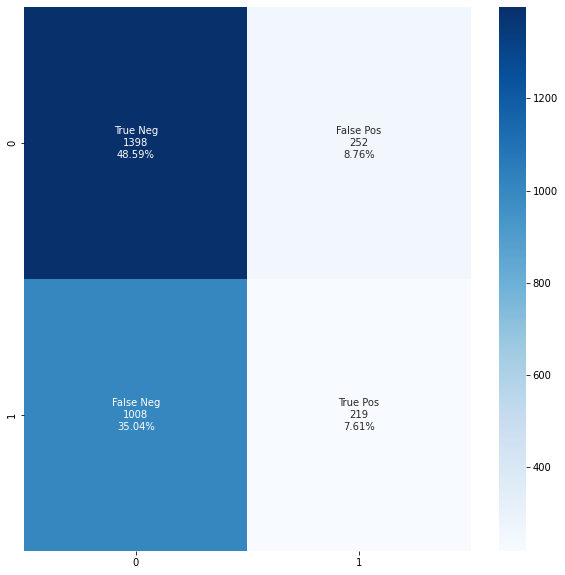

In [65]:
plt.figure(figsize = (10,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', )

In [71]:
accuracy_score(df1.y, df1.y_hatM1)

0.5620437956204379

In [66]:
recall_score(df1.y, df1.y_hatM1)

0.1784841075794621

In [50]:
precision_score(df1.y, df1.y_hatM1)

0.46496815286624205

In [74]:
roc_auc_score(df1.y, df1.y_hatM1)

0.5128784174260947

# Converters-II

In [67]:
cf_matrix =confusion_matrix(df1.y, df1.y_hatM2)

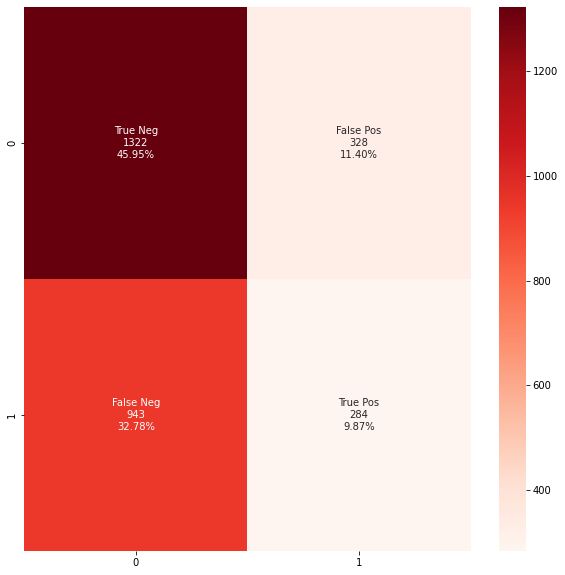

In [68]:
plt.figure(figsize = (10,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds', )

In [72]:
accuracy_score(df1.y, df1.y_hatM2)

0.5582203684393465

In [69]:
recall_score(df1.y, df1.y_hatM2)

0.23145884270578648

In [70]:
precision_score(df1.y, df1.y_hatM2)

0.46405228758169936

In [73]:
roc_auc_score(df1.y, df1.y_hatM2)

0.5163354819589538